In [2]:
from dolfin import *
import meshio

If physical entities are defined, the output mesh only contains those elements that belong to physical entities. Thus while creating physical entities it is very important that you mark all the parts of the domain as physical and assign them some name.

In [3]:
mesh = meshio.read("Models/tagging.msh")
points, cells, cell_data, field_data = mesh.points, mesh.cells, mesh.cell_data, mesh.field_data

In gmsh
* 1 -> Line
* 2 -> 3 noded triangle
* Therefore the field data tells us that `bottom` tag is assigned number tag 1 and is of type line.
* Similarly `domain` is assigned number tag 5 and is of type triangle

In [4]:
field_data

{'bottom': array([1, 1]),
 'right': array([2, 1]),
 'top': array([3, 1]),
 'left': array([4, 1]),
 'domain': array([5, 2])}

In meshio `cell data` is a dictionary. The `key` represents the element type and the `value` is again a dictionary. 
The dictionary of a particular element type house a key `gmsh:physical` for which the values represents the `number tag` of corresponding element defined in `cells`.  

In [5]:
cell_data

{'line': {'gmsh:physical': array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
         3, 4, 4, 4, 4, 4, 4, 4, 4])},
 'triangle': {'gmsh:physical': array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])}}

In [6]:
points

array([[ 0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  1.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ],
       [ 0.125     ,  0.        ,  0.        ],
       [ 0.25      ,  0.        ,  0.        ],
       [ 0.375     ,  0.        ,  0.        ],
       [ 0.5       ,  0.        ,  0.        ],
       [ 0.625     ,  0.        ,  0.        ],
       [ 0.75      ,  0.        ,  0.        ],
       [ 0.875     ,  0.        ,  0.        ],
       [ 1.        ,  0.125     ,  0.        ],
       [ 1.        ,  0.25      ,  0.        ],
       [ 1.        ,  0.375     ,  0.        ],
       [ 1.        ,  0.5       ,  0.        ],
       [ 1.        ,  0.625     ,  0.        ],
       [ 1.        ,  0.75      ,  0.        ],
       [ 1.        ,  0.875     ,  0.        ],
       [ 0.875     ,  1.        ,  0.        ],
       [ 0.75      ,  1.        ,  0.        ],
       [ 0.625     ,  1.        ,  0.   

In [7]:
cells['triangle'].shape

(180, 3)

In [8]:
cells

{'line': array([[ 0,  4],
        [ 4,  5],
        [ 5,  6],
        [ 6,  7],
        [ 7,  8],
        [ 8,  9],
        [ 9, 10],
        [10,  1],
        [ 1, 11],
        [11, 12],
        [12, 13],
        [13, 14],
        [14, 15],
        [15, 16],
        [16, 17],
        [17,  2],
        [ 2, 18],
        [18, 19],
        [19, 20],
        [20, 21],
        [21, 22],
        [22, 23],
        [23, 24],
        [24,  3],
        [ 3, 25],
        [25, 26],
        [26, 27],
        [27, 28],
        [28, 29],
        [29, 30],
        [30, 31],
        [31,  0]]), 'triangle': array([[ 32,  56,  46],
        [ 37,  59,  47],
        [ 34,  58,  46],
        [ 52,  59,  37],
        [ 33,  59,  52],
        [ 51,  60,  38],
        [ 35,  60,  51],
        [ 36,  65,  45],
        [ 59,  78,  47],
        [ 51,  96,  35],
        [ 52,  95,  33],
        [ 22,  71,  52],
        [ 29,  72,  53],
        [ 15,  74,  51],
        [  8,  73,  50],
        [ 54,  68,  20],
   

### Creating the actual mesh of triangles

In [9]:
meshio.write("Models/tag_triangle.xdmf", meshio.Mesh(
    points=points,
    cells={"triangle": cells["triangle"]}))

### Creating a XDMF file of tagged boundary to be read by MeshValueCollection

The command below would make an array of all the tags related to line

In [10]:
line_tags=cell_data["line"]["gmsh:physical"]

Now we can use the above created array to extract the line data corresponding to a certain tag from `cells`

In [11]:
cells["line"][line_tags==field_data["bottom"][0]] 

array([[ 0,  4],
       [ 4,  5],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9, 10],
       [10,  1]])

In [12]:
meshio.write("Models/tag_bottom.xdmf", meshio.Mesh(
    points=points,
    cells={"line": cells["line"][line_tags==field_data["bottom"][0]]},# put data corresponding to that tag
    cell_data={"line": {"bottom": line_tags[line_tags==field_data["bottom"][0]]}}
))

In [13]:
meshio.write("Models/tag_all.xdmf", meshio.Mesh(
    points=points,
    cells={"line": cells["line"]},
    cell_data={"line": {"all_tags": line_tags}}
))

# Step 3: Reading mesh in dolfinx

In [14]:
import dolfin
import dolfin.io

In [15]:
mesh_2d = dolfin.UnitIntervalMesh(dolfin.MPI.comm_world, 2)
with dolfin.io.XDMFFile(dolfin.MPI.comm_world,"Models/tag_triangle.xdmf") as xdmf_infile:
    mesh_2d = xdmf_infile.read_mesh(dolfin.MPI.comm_world, dolfin.cpp.mesh.GhostMode.none)

In [16]:
import dolfin.plotting as plt
%matplotlib inline

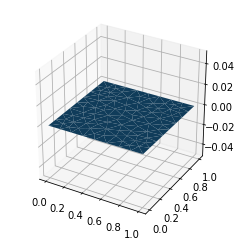

In [17]:
plt.plot(mesh_2d)

# MeshValueCollection
The MeshValueCollection class can be used to store data associated with a subset of the entities of a mesh of a given topological dimension. It differs from the MeshFunction class in two ways. First, data does not need to be associated with all entities (only a subset). Second, data is associated with entities through the corresponding cell index and local entity number (relative to the cell), not by global entity index, which means that data may be stored robustly to file.

In [18]:
mvc = dolfin.MeshValueCollection("size_t", mesh_2d, 1) #The mesh entity dimension for the mesh value collection.

## Reading 1d line data into dolfin mvc

tag_bottom.xdmf file has the table that tells which lines correspond to the tag bottom. It does so by specifying the node number of the end points of line. 

When we give this to read_mvc along with the complete mesh of triangles it reads the point data from mesh_2d, creates the node--line table and marks the elemets corresponding to bottom

In [19]:
with dolfin.io.XDMFFile(dolfin.MPI.comm_world,"Models/tag_bottom.xdmf") as xdmf_infile:
    mvc = xdmf_infile.read_mvc_size_t(mesh_2d,"bottom")

In [20]:
with dolfin.io.XDMFFile(dolfin.MPI.comm_world,"Models/tag_all.xdmf") as xdmf_infile:
    mvc_all = xdmf_infile.read_mvc_size_t(mesh_2d,"all_tags")

In [21]:
mvc.values()

{(34, 1): 1,
 (37, 1): 1,
 (74, 1): 1,
 (86, 1): 1,
 (87, 1): 1,
 (104, 1): 1,
 (108, 1): 1,
 (112, 1): 1}

In [22]:
print("Constructing MeshFunction from MeshValueCollection")
mf = dolfin.cpp.mesh.MeshFunctionSizet(mesh_2d, mvc_all, 0) # 0=default value for mf

Constructing MeshFunction from MeshValueCollection


In [23]:
mf.array()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 3, 0, 4, 0, 1, 0, 2, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint64)

In [24]:
mf.array().size

286

In [25]:
mesh_2d.num_entities(0) #Points

107

In [26]:
mesh_2d.num_entities(1) #Edges

286

In [27]:
mesh_2d.num_entities(2) #faces/triangles

180

In [28]:
edge=MeshEntity(mesh_2d,1,104)

In [29]:
#help(edge)

In [30]:
entity=MeshEntities(mesh_2d,1)

In [31]:
edge_table=[]
for en in entity:
    edge_table.append(en.entities(0))

In [32]:
edge_table[121]

array([56, 27], dtype=int32)

In [33]:
mvc.values()

{(34, 1): 1,
 (37, 1): 1,
 (74, 1): 1,
 (86, 1): 1,
 (87, 1): 1,
 (104, 1): 1,
 (108, 1): 1,
 (112, 1): 1}

In [34]:
mf.where_equal(1)

[121, 122, 157, 158, 211, 217, 245, 260]

In [35]:
mesh_2d.cells()[34]

array([56, 28, 27], dtype=int32)

In [36]:
vertex=Vertex(mesh_2d,58)

In [37]:
vertex.point()

array([ 0.  ,  0.25,  0.  ])

In [38]:
vertex.entities(0)

array([58], dtype=int32)

In [39]:
for ve in Vertices(mesh_2d):
    print(ve.entities(0))

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[78]
[79]
[80]
[81]
[82]
[83]
[84]
[85]
[86]
[87]
[88]
[89]
[90]
[91]
[92]
[93]
[94]
[95]
[96]
[97]
[98]
[99]
[100]
[101]
[102]
[103]
[104]
[105]
[106]


In [40]:
mf.size()

286

In [41]:
mesh_2d.topology.size(1)

286

In [42]:
D=mesh_2d.topology.dim
D

2

In [43]:
mesh_2d.create_connectivity(1,2)# connectivity in a 2d geo of lines

In [44]:
connectivity=mesh_2d.topology.connectivity(1,2)

In [45]:

for entity_index in range(mesh_2d.topology.size(1)):
    if(connectivity.size(entity_index)>0):
        entity = MeshEntity(mesh_2d, 1, entity_index)
        for i in range(entity.num_entities(D)):
            print( connectivity.connections(entity_index)[i])
            #cell = Cell(mesh_2d, connectivity.connections(entity_index)[i])
            #local_entity = cell.index()
            #print(cell.index(),";",local_entity,";", mf[entity_index])
        

0
71
0
44
71
128
19
44
19
81
81
128
0
41
60
97
60
72
71
97
41
135
72
135
2
50
2
92
44
92
41
98
50
98
1
3
1
52
3
55
25
65
25
68
55
68
52
65
1
8
3
4
4
60
8
97
26
90
26
49
8
129
49
52
90
129
2
31
31
93
50
101
93
171
101
171
32
107
92
107
32
94
31
94
4
10
10
159
11
29
11
159
29
55
10
168
58
61
58
72
61
168
5
6
5
56
6
9
9
158
13
28
13
158
28
56
5
79
6
26
79
95
90
95
43
80
24
43
79
80
24
67
56
67
9
169
49
78
78
169
7
42
7
51
42
62
51
99
62
170
99
170
7
21
42
43
21
80
20
107
20
21
32
53
51
53
128
129
126
158
130
169
126
130
127
159
131
168
127
131
11
35
29
77
35
77
35
152
142
152
127
142
12
36
12
30
30
76
36
76
12
157
36
155
124
157
140
155
124
140
54
66
30
54
66
100
100
157
13
33
28
75
33
75
33
149
143
149
126
143
14
34
14
27
27
74
34
74
14
156
34
154
125
156
141
154
125
141
57
64
27
57
64
102
102
156
15
120
15
46
25
46
65
73
73
120
15
39
39
151
120
147
139
151
139
147
46
105
39
105
16
121
16
48
23
48
23
63
63
91
91
121
16
37
37
150
121
144
137
150
137
144
48
104
37
104
17
122
17
45
24
45
62

In [46]:
entity.num_entities(D)

2

In [47]:
entity.index()

285

In [48]:
connectivity.connections(entity_index)[0]

138

In [49]:
entity.entities(0)

array([106, 102], dtype=int32)

In [50]:
mesh_2d.create_connectivity(0,1)# connectivity in a 2d geo of lines

In [51]:
connectivity=mesh_2d.topology.connectivity(0,1)

In [52]:
for entity_index in range(mesh_2d.topology.size(1)):
        entity = MeshEntity(mesh_2d, 1, entity_index)
        print(entity_index,entity.entities(0))
        

0 [0 1]
1 [0 2]
2 [ 0 17]
3 [ 0 42]
4 [ 0 43]
5 [ 0 75]
6 [1 2]
7 [1 4]
8 [1 9]
9 [ 1 17]
10 [ 1 63]
11 [67  1]
12 [6 2]
13 [7 2]
14 [ 2 42]
15 [ 2 63]
16 [ 2 65]
17 [3 4]
18 [3 5]
19 [8 3]
20 [30  3]
21 [ 3 49]
22 [ 3 52]
23 [ 3 64]
24 [4 5]
25 [8 4]
26 [9 4]
27 [ 4 17]
28 [ 5 11]
29 [ 5 13]
30 [17  5]
31 [ 5 64]
32 [ 5 75]
33 [6 7]
34 [ 6 54]
35 [65  6]
36 [ 6 92]
37 [ 6 94]
38 [16  7]
39 [ 7 42]
40 [ 7 47]
41 [ 7 54]
42 [9 8]
43 [ 8 19]
44 [20  8]
45 [21  8]
46 [ 8 52]
47 [ 9 19]
48 [39  9]
49 [ 9 67]
50 [ 9 68]
51 [10 11]
52 [10 12]
53 [13 10]
54 [10 18]
55 [25 10]
56 [26 10]
57 [10 51]
58 [12 11]
59 [13 11]
60 [11 43]
61 [11 75]
62 [12 15]
63 [36 12]
64 [12 43]
65 [12 48]
66 [12 51]
67 [13 18]
68 [13 64]
69 [13 70]
70 [14 15]
71 [14 16]
72 [36 14]
73 [66 14]
74 [14 69]
75 [14 93]
76 [16 15]
77 [36 15]
78 [43 15]
79 [16 42]
80 [43 16]
81 [16 47]
82 [16 66]
83 [17 75]
84 [26 18]
85 [70 18]
86 [105  18]
87 [21 19]
88 [68 19]
89 [106  19]
90 [20 21]
91 [20 52]
92 [57 20]
93 [20 74]
94

In [53]:
mesh_2d.e

286

In [86]:
help(mesh_2d)

Help on Mesh in module dolfin.cpp.mesh object:

class Mesh(pybind11_builtins.pybind11_object)
 |  Mesh object
 |  
 |  Method resolution order:
 |      Mesh
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(...)
 |      __init__(self: dolfin.cpp.mesh.Mesh, arg0: MPICommWrapper, arg1: dolfin.cpp.mesh.CellType.Type, arg2: numpy.ndarray[float64[m, n], flags.c_contiguous], arg3: numpy.ndarray[int64[m, n], flags.c_contiguous], arg4: List[int], arg5: dolfin.cpp.mesh.GhostMode) -> None
 |  
 |  cell_name(...)
 |      cell_name(self: dolfin.cpp.mesh.Mesh) -> str
 |  
 |  cells(...)
 |      cells(self: dolfin.cpp.mesh.Mesh) -> array
 |  
 |  coordinate_dofs(...)
 |      coordinate_dofs(self: dolfin.cpp.mesh.Mesh) -> dolfin.cpp.mesh.CoordinateDofs
 |  
 |  create_connectivity(...)
 |      create_connectivity(self: dolfin.cpp.mesh.Mesh, arg0: int, arg1: int) -> None
 |  
 |  create_connectivity_all(...)
 |      create_connectivity_a

In [84]:
entity=MeshEntity(mesh_2d,1,0)

In [85]:
entity.num_entities(0)

2